In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "/Users/jbeiting/Desktop/CS_539/Team_assignment_4"]).decode("utf8"))

Bagged_Tree_MNIST.ipynb
MNIST_RandomForest.ipynb
mnist_rf.csv
test.csv
train.csv



In [26]:
train = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/train.csv')
test = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/test.csv')

In [27]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [28]:
df_x = train.iloc[:,1:]
df_y = train.iloc[:,0]

In [29]:
def print_image(row, df):
    temp = df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

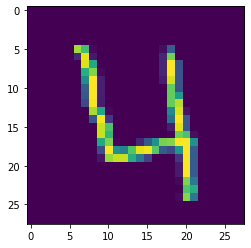

In [30]:
print_image(3, df_x)

In [31]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (33600, 784)
X_test shape:  (8400, 784)


In [32]:
def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    """
        Calculates the accuracy score between labels and predictions.
        
        :param y_true: The true labels of the data
        :param y_pred: The predictions for the data
        
        :return: a floating point number denoting the accuracy
    """
    return round(accuracy_score(y_true, y_pred) * 100, 2)

In [33]:
# Train baseline decision tree model
clf = DecisionTreeClassifier(max_depth = 10, random_state = 1234)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1234)

In [34]:
# Get all pixel features
features = [col for col in train.columns if col.startswith('pixel')]
# Split up training to for validation
X_train, X_val, y_train, y_val = train_test_split(train[features], 
                                                  train['label'], 
                                                  test_size = 0.25, 
                                                  random_state = 1234)

In [35]:
train_preds_baseline = clf.predict(X_train)
val_preds_baseline = clf.predict(X_val)
acc_baseline_train = acc(train_preds_baseline, y_train)
acc_baseline_val = acc(val_preds_baseline, y_val)
print(f'Training accuracy for our baseline (using all pixel features): {acc_baseline_train}%')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_baseline_val}%')

Training accuracy for our baseline (using all pixel features): 89.57%
Validation accuracy for our baseline (using all pixel features): 89.36%


In [36]:
pred = clf.predict(X_test)
print("Classification Report: \n", classification_report(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       813
           1       0.92      0.96      0.94       961
           2       0.84      0.78      0.81       860
           3       0.83      0.79      0.81       863
           4       0.85      0.85      0.85       827
           5       0.77      0.79      0.78       756
           6       0.90      0.88      0.89       841
           7       0.90      0.87      0.88       899
           8       0.76      0.77      0.77       768
           9       0.74      0.85      0.79       812

    accuracy                           0.85      8400
   macro avg       0.84      0.84      0.84      8400
weighted avg       0.85      0.85      0.85      8400

Confusion Matrix: 
 [[740   0   8   5   7  19   8   2  12  12]
 [  2 920   7   8   4   3   2   0   8   7]
 [ 13  13 674  34  15  16  18  23  38  16]
 [  4   8  28 682  13  48   4  27  22  27]
 [  3   6   5   5 700   

In [37]:
# Cross validation
clf.fit(df_x, df_y)
score = cross_val_score(clf, df_x, df_y)
print('Score: ', np.mean(score))

Score:  0.8464285714285715


In [38]:
pred = clf.predict(test)

In [39]:
pred = pd.Series(pred,name = "Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_clf.csv", index = False)